In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten
from keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split

In [18]:
train_path  = 'Data/train.csv'
test_path = 'Data/test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [19]:
#separating labels and pixel values converted to numpy array from DF
X_train = (train_df.iloc[:, 1:]).values.astype('float32')
y_train = train_df.iloc[:,0].values.astype('int32')

X_test = test_df.values.astype('float32')

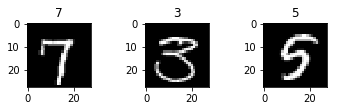

In [20]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(6,9):
    plt.subplot(330 + (i + 1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i])

In [21]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train.shape

(42000, 28, 28, 1)

In [22]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_test.shape

(28000, 28, 28, 1)

In [23]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x):
    return(x-mean_px)/std_px

In [24]:
#getting the class/labels set
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

In [25]:
seed = 43
np.random.seed(seed)

In [26]:
#linear model imports
from keras.models import Sequential
from keras.layers.core import Lambda, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D, MaxPooling2D

In [42]:
#defining the model
model = Sequential()
model.add(Lambda(standardize, input_shape = (28, 28, 1))) #use standardize method defined above
#model.add(Lambda(monochrome))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_13 (Lambda)           (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [44]:
#creating the model for the ML

#Learning Rate = 0.001
from keras.optimizers import RMSprop
model.compile(optimizer = RMSprop(lr = 0.001),
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [45]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train,  y_val = train_test_split(X_train, y_train, test_size = 0.10, random_state = 42)
batches = gen.flow(X_train, y_train, batch_size = 64)
val_batches = gen.flow(X_val, y_val, batch_size = 64)

In [47]:
history = model.fit_generator(batches, batches.n, nb_epoch = 1,
                             validation_data = val_batches, 
                             nb_val_samples = val_batches.n)

C:\Users\Michael\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Michael\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., 34020, epochs=1, validation_data=<keras.pre..., validation_steps=3780)`
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/1
34020/34020 [==============================] - 223s 7ms/step - loss: 0.2403 - acc: 0.9342 - val_loss: 0.3099 - val_acc: 0.9172


In [ ]:
history_dict = history.history
history_dict.keys()

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
plt.clf()
acc_values = history_dict['acc']
val_acc_value = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_value, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [ ]:
model.optimizer.lr = 0.01
gen = image.ImageDataGenerator()
batches = gen.flow(X_train, y_train, batch_size = 64)
history = model.fit_generator(batches, batches.n, nb_epoch = 1)

In [ ]:
#predicting the labels of test set
predictions = model.predict_classes(X_test, verbose = 0)

submissions = pd.DataFrame({"ImageID": list(range(1, len(predictions)+1)),"Label": predictions})
submissions.to_csv("DR.csv", index = False, header = True)